In [1]:
#Keras import 및 버전 확인

import keras
keras.__version__

'2.15.0'

In [2]:
#CoLab : 2.10.12

!python -V

Python 3.10.12


In [ ]:
!nvidia-smi

Thu Mar 21 01:45:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.86                 Driver Version: 551.86         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
|  0%   33C    P8              3W /  220W |       0MiB /  12282MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1. Data loading

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## 2. Data check

In [4]:
print('train img shape / type ; ', train_images.shape, type(train_images))
print('train label shape / type ; ', train_labels.shape, type(train_labels))
print('test img shape / type ; ', test_images.shape, type(test_images))
print('test label shape / type ; ', test_labels.shape, type(test_labels))

train img shape / type ;  (60000, 28, 28) <class 'numpy.ndarray'>
train label shape / type ;  (60000,) <class 'numpy.ndarray'>
test img shape / type ;  (10000, 28, 28) <class 'numpy.ndarray'>
test label shape / type ;  (10000,) <class 'numpy.ndarray'>


###2-1. image - label 간 매칭을 확인해보세요.

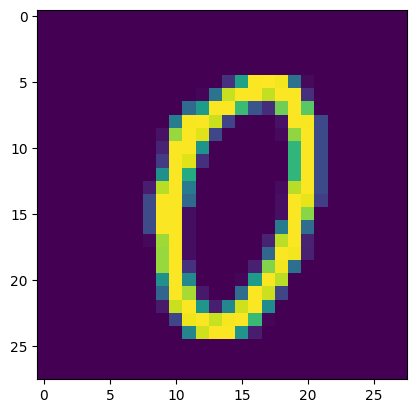

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1000])

In [6]:
train_labels[1000]

0

###2-2. 데이터 분포를 확인해보세요.


In [7]:
label_list = list(set(train_labels))
label_list.sort()
label_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
label_count = [list(train_labels).count(label_list[i]) for i in range(len(label_list))]
label_count

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

<BarContainer object of 10 artists>

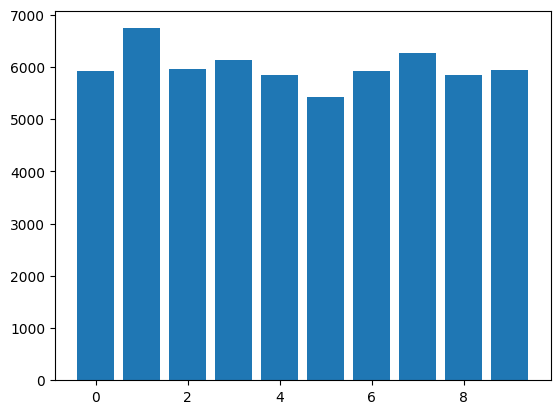

In [ ]:
plt.bar(label_list,label_count)

## 3. 모델 설계 및 학습

###3-1. activation function을 변경하고 학습 후 loss curve를 비교해보세요.

activation function 종류 확인 : https://keras.io/api/layers/activations/

- relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential

###3-2. 각 레이어의 노드 수를 변경하고 학습 후 loss curve를 비교해보세요.

###3-3 모델의 레이어를 변경하고 학습 후 loss curve를 비교해보세요.

###3-4. optimizer를 변경하고 학습 후 loss curve를 비교해보세요.

keras.optimizers 이용 : https://keras.io/api/optimizers/

- optimizer list : SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl


keras fit method argument list

Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

Base model

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='tanh', input_shape=(28 * 28,)))
network.add(layers.Dense(128, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax')) #하려는게 0~10의 분류문제이므로 10으로 지정 확률로하는 softmax => 분류문제는 클래스 갯수 softmax를 일반적으로 사용


In [10]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# 분류는 categorical_cross...사용

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
#트레인 6만장 0~255 픽셀
#스케일링해줌
#786 언디센트?로 바뀜

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [14]:
train_images[0].shape

(784,)

In [15]:
#원-핫 인코딩

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
train_labels.shape

(60000, 10)

In [17]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
import time

start_time = time.time()

history = network.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)

end_time = time.time()

execution_time = end_time - start_time

# 실행 시간 출력
print(f"실행 시간: {execution_time}초")


# 6만장 중 10%뺀 5.4만장 중 배치사이즈 128로 나누면 iteration 갯수가 나옴
# 트레인데이터셋에서 90프로로 학습하고 10프로만 검증
# 향후에 테스트데이터셋으로 검증

# 4070 Super : 10.83초
# T4 : 19.11초

Epoch 1/10
422/422 [==============================] - 5s 5ms/step - loss: 0.3725 - accuracy: 0.9006 - val_loss: 0.1661 - val_accuracy: 0.9558
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1675 - accuracy: 0.9516 - val_loss: 0.1112 - val_accuracy: 0.9700
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1143 - accuracy: 0.9667 - val_loss: 0.0857 - val_accuracy: 0.9755
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0817 - accuracy: 0.9771 - val_loss: 0.0759 - val_accuracy: 0.9787
Epoch 5/10
422/422 [==============================] - 1s 4ms/step - loss: 0.0614 - accuracy: 0.9822 - val_loss: 0.0769 - val_accuracy: 0.9762
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0446 - accuracy: 0.9871 - val_loss: 0.0689 - val_accuracy: 0.9777
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0333 - accuracy: 0.9911 - val_loss: 0.0653 - val_accuracy: 0.9798
Epoch 

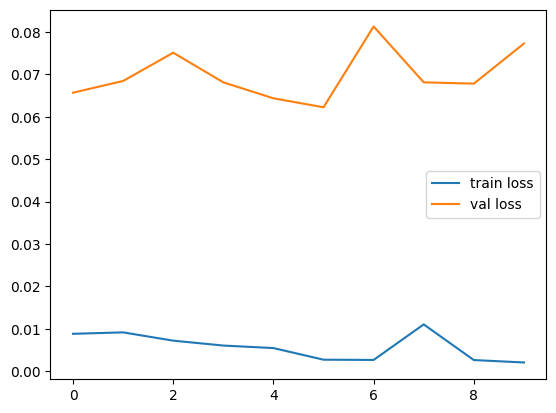

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('loss.png')

# 오버핏 확인 => 오버핏 이후 성능에 변화가 없으므로 그냥 사용하자

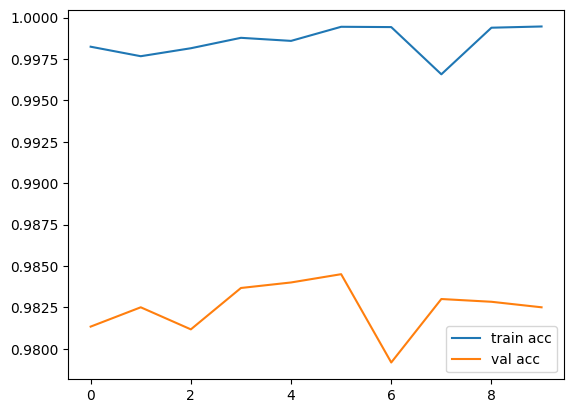

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('acc.png')

# 오버핏 확인

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9796


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9796000123023987
